# Exploratory Data Analysis [ EDA ] - Flight Price 

### FEATURES - The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [504]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.style as style
style.use("ggplot")
import warnings
warnings.filterwarnings('ignore')
font1 = {'family':'serif','color':'darkred','size':16}
font2 = {'family':'serif','color':'darkred','size':12}

### Look at the dataset first 

In [506]:
data = pd.read_excel('flight_price.xlsx')

In [507]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


- This cleaned flight dataset contains categorical features describing airlines, routes, timings, stops, and travel class, along with numerical features like journey duration and days left until departure.
The features collectively capture when, where, and how a flight operates, as well as booking-related timing effects.

In [509]:
## get the basics info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- The dataset contains 10,683 flight records with 11 features, and is largely complete, with only 2 missing values each in Route and Total_Stops, indicating good data quality.
- Most features are stored as categorical (object) types, even those that are time- or duration-based (Date_of_Journey, Dep_Time, Arrival_Time, Duration), suggesting the need for feature engineering before analysis or modeling.

### Shape of dataset 

In [512]:
print('shape of the dataset ::',data.shape)
print('Number of total Rows ::',data.shape[0])
print('Number of total Columns ::',data.shape[1])

shape of the dataset :: (10683, 11)
Number of total Rows :: 10683
Number of total Columns :: 11


- Each row represent indiviual flight
- The dataset has 11 column, each describeing different attribute of a flight as source, route, etc.

## Feature Enggineering and Cleaning 

### Spliting 'Date_of_Journey' column into 'Date','Month','Year' seperate column 

In [516]:
## Feature Engineering
data['Date']  = data['Date_of_Journey'].str.split('/').str[0]
data['Month'] = data['Date_of_Journey'].str.split('/').str[1]
data['Year']  = data['Date_of_Journey'].str.split('/').str[2]

In [517]:
## Coverting datatupe of object into int 
data['Date']  = data['Date'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Year']  = data['Year'].astype(int)

In [518]:
## Drop Date Of Journey
data.drop('Date_of_Journey',axis=1,inplace=True)

In [519]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


### Spliting 'Arrival_Time' into 'Arrival_hour', Arrival_min'

In [521]:
data['Arrival_Time'] = data['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [522]:
data['Arrival_hour'] = data['Arrival_Time'].str.split(':').str[0]
data['Arrival_min']  = data['Arrival_Time'].str.split(':').str[1]

In [523]:
data['Arrival_hour'] = data['Arrival_hour'].astype(int)
data['Arrival_min']  = data['Arrival_min'].astype(int)

In [524]:
data.drop('Arrival_Time',axis=1,inplace=True)

In [525]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


### Spliting 'Dep_Time' into 'Departure_hour', 'Departure_min'

In [527]:
data['Departure_hour'] = data['Dep_Time'].str.split(':').str[0]
data['Departure_min']  = data['Dep_Time'].str.split(':').str[1]

In [528]:
data['Departure_hour'] =data['Departure_hour'].astype(int)
data['Departure_min']  =data['Departure_min'].astype(int)

In [529]:
data.drop('Dep_Time',axis=1,inplace=True)

In [530]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


### Filling NAN value of Total Stop and convert into int

In [532]:
print(data['Total_Stops'].unique())
print(data['Total_Stops'].mode())

['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']
0    1 stop
Name: Total_Stops, dtype: object


In [533]:
data['Total_Stops'] = data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [534]:
data['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

### Dataset has 'Source' and 'Destination' so dropping 'Route'

In [536]:
data.drop('Route',axis=1,inplace=True)

In [537]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50


### Converting 'Durration' -> 2h 50m to minutes 

In [539]:
def duration_to_minutes(duration):
    hours = 0
    minutes = 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
    if 'm' in duration:
        minutes = int(duration.split('m')[0].split()[-1])
    return hours * 60 + minutes
data['Duration'] = data['Duration'].apply(duration_to_minutes)

In [540]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,2019,13,15,5,50


In [541]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Duration         10683 non-null  int64 
 4   Total_Stops      10683 non-null  int64 
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Date             10683 non-null  int32 
 8   Month            10683 non-null  int32 
 9   Year             10683 non-null  int32 
 10  Arrival_hour     10683 non-null  int32 
 11  Arrival_min      10683 non-null  int32 
 12  Departure_hour   10683 non-null  int32 
 13  Departure_min    10683 non-null  int32 
dtypes: int32(7), int64(3), object(4)
memory usage: 876.5+ KB


### How many unique airlines operate in the dataset, and which airline appears most frequently?

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64


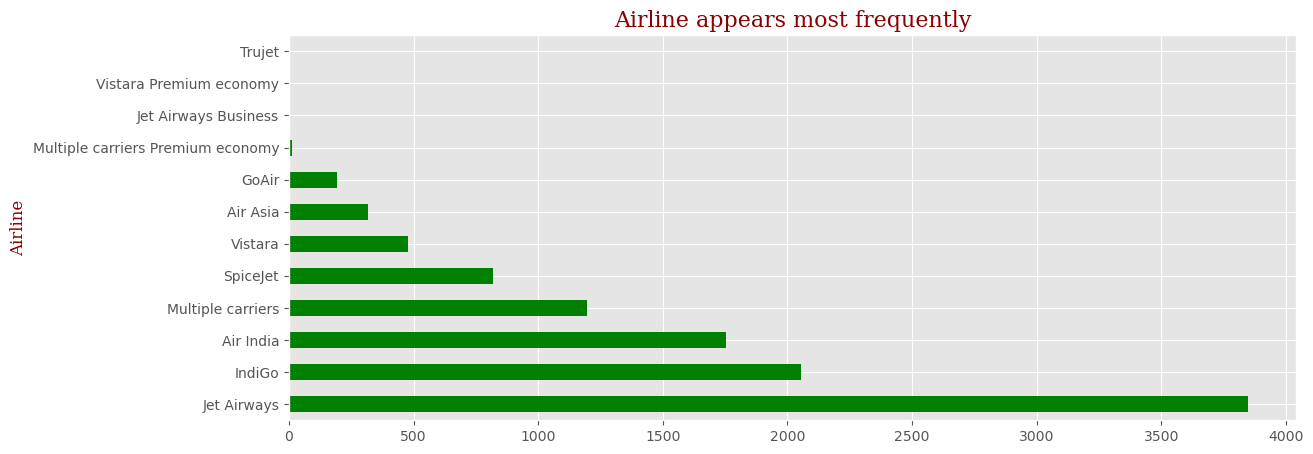

In [543]:
print(data['Airline'].value_counts())
plt.figure(figsize=(13,5))
data['Airline'].value_counts().plot(kind='barh',color='green')
plt.title("Airline appears most frequently",fontdict=font1)
plt.ylabel("Airline",fontdict=font2)
plt.show()

- Jet Airways dominates the dataset, accounting for a large share of flights, indicating strong market presence and higher route coverage during the observed period.
- IndiGo and Air India follow as major carriers, reflecting their role as high-frequency domestic operators, while SpiceJet and Vistara represent mid-range participation.

### What are the most common source–destination city pairs?

In [546]:
data.groupby(['Source','Destination'])['Airline'].value_counts()

Source    Destination  Airline                          
Banglore  Delhi        Jet Airways                           370
                       IndiGo                                366
                       SpiceJet                              137
                       Vistara                               131
                       Air India                             120
                       Air Asia                               71
                       GoAir                                  69
                       Vistara Premium economy                 1
          New Delhi    Jet Airways                           418
                       Air India                             212
                       IndiGo                                157
                       Vistara                                54
                       SpiceJet                               44
                       GoAir                                  24
                       Air Asia  

- Delhi → Cochin is the busiest route in the dataset, dominated by Jet Airways, followed by Multiple Carriers, showing both high demand and strong competition on this sector.
- Jet Airways consistently leads across almost all major routes (Banglore–Delhi, Kolkata–Banglore, Delhi–Cochin), highlighting its wide network coverage and high flight frequency.

### How is flight data distributed across different months

In [549]:
data['Month'].value_counts()

Month
5    3466
6    3414
3    2724
4    1079
Name: count, dtype: int64

- May (Month 5) and June (Month 6) dominate the dataset, together accounting for the majority of flights, indicating peak travel demand during late summer and early holiday periods.
- March (Month 3) shows moderate flight activity, suggesting steady but lower demand compared to peak months.
- April (Month 4) has the lowest number of flights, reflecting a relatively quieter travel period in the dataset.

### What is the overall distribution of flight prices ?

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64


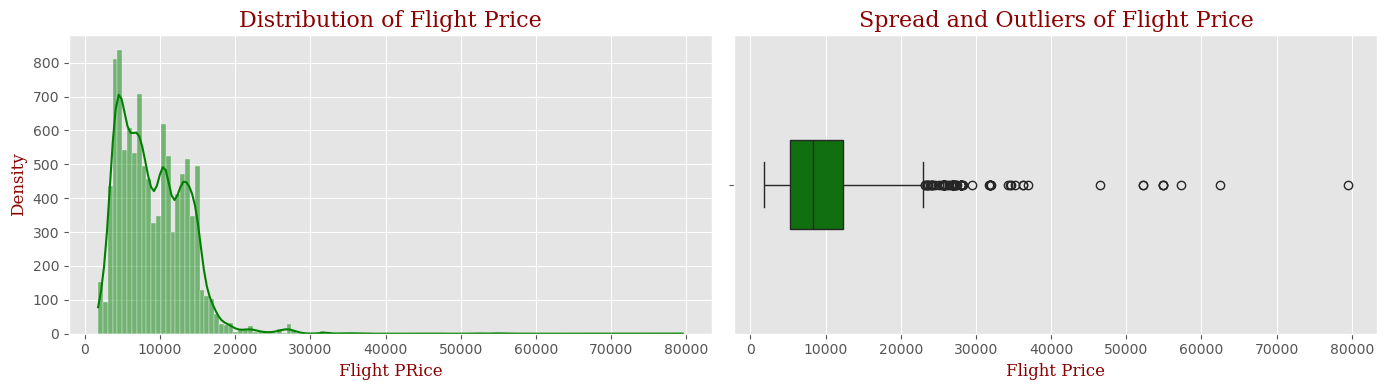

In [552]:
print(data['Price'].describe())
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(data['Price'],color = 'green',kde=True)
plt.title("Distribution of Flight Price",fontdict=font1)
plt.xlabel("Flight PRice",fontdict=font2)
plt.ylabel("Density",fontdict=font2)

plt.subplot(122)
sns.boxplot(x = data['Price'],width=0.3,color='green')
plt.title('Spread and Outliers of Flight Price',fontdict=font1)
plt.xlabel("Flight Price",fontdict=font2)
plt.tight_layout()
plt.show()

- Flight prices show a right-skewed (positively skewed) distribution, with most tickets concentrated in the lower to mid-price range and a long tail of high-priced flights.
- The median price (8,372) is lower than the mean (9,087), confirming the presence of expensive outliers that pull the average upward.
- A small number of flights are priced extremely high (up to ~79,500), indicating premium routes, business-class tickets, or peak-demand scenarios, while the majority of flights remain relatively affordable.

### Which airline has the highest and lowest average ticket price?

In [555]:
airline_avg_price = (
    data.groupby('Airline')['Price']
        .mean()
        .sort_values()
)

lowest_avg = airline_avg_price.head(1)
highest_avg = airline_avg_price.tail(1)

print("Airline with Lowest Average Ticket Price:\n", lowest_avg)
print("\nAirline with Highest Average Ticket Price:\n", highest_avg)

Airline with Lowest Average Ticket Price:
 Airline
Trujet    4140.0
Name: Price, dtype: float64

Airline with Highest Average Ticket Price:
 Airline
Jet Airways Business    58358.666667
Name: Price, dtype: float64


- Trujet has the lowest average ticket price (~₹4,140), confirming its position as a budget-focused airline, likely operating short routes with minimal added services.
- Jet Airways Business records the highest average ticket price (~₹58,359), reflecting its premium business-class offering, higher service levels, and limited seat availability.

### Stop Analysis
    How does price vary with the number of total stops? 
    Are non-stop flights more expensive than flights with one or more stops?

Total_Stops
0     5024.900315
1    10593.570032
2    12715.807895
3    13112.000000
4    17686.000000
Name: Price, dtype: float64


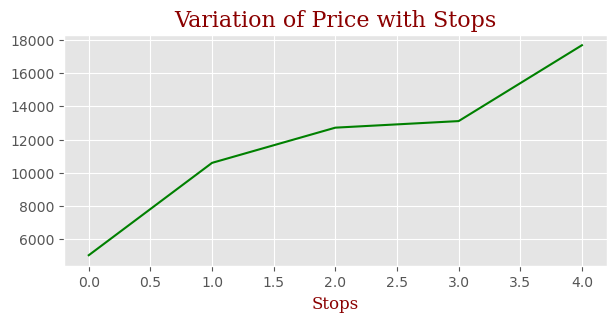

In [558]:
print(data.groupby('Total_Stops')['Price'].mean())
plt.figure(figsize=(7,3))
data.groupby("Total_Stops")['Price'].mean().plot(kind='line',color='green')
plt.title("Variation of Price with Stops",fontdict=font1)
plt.xlabel("Stops",fontdict=font2)
plt.show()

- Non-stop flights (0 stops) are the cheapest on average (~₹5,025), indicating strong competition and high frequency on direct routes.
- Average ticket price increases steadily with the number of stops, rising sharply for flights with 2 or more stops, suggesting these routes are either longer, less direct, or less competitive.
- Flights with 4 stops have the highest average price (~₹17,686), likely representing rare, long, or operationally complex routes with limited alternatives.

- In this dataset, non-stop flights are actually cheaper on average than flights with one or more stops.
- While non-stop flights have the lowest mean price, ticket prices increase progressively with each additional stop, indicating that multi-stop journeys tend to be costlier.

### How does total flight duration (in minutes) affect ticket price?

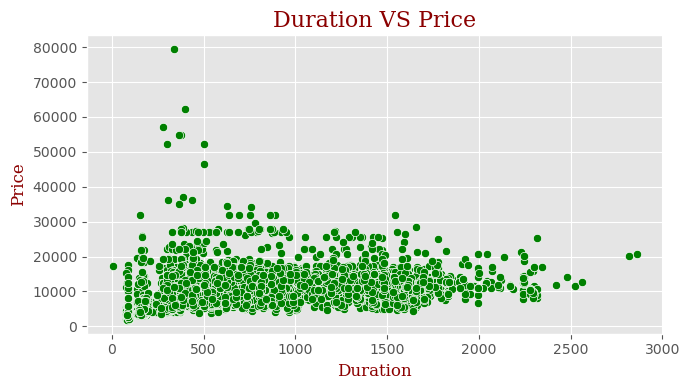


 Correlation Between Duration and Price  :: 0.5063714821960478


In [562]:
plt.figure(figsize=(7,4))
sns.scatterplot(x= data['Duration'], y = data['Price'],color='green')
plt.title("Duration VS Price",fontdict=font1)
plt.xlabel("Duration",fontdict=font2)
plt.ylabel("Price",fontdict=font2)
plt.tight_layout()
plt.show()
print("\n Correlation Between Duration and Price  ::",data['Duration'].corr(data['Price']))

- The correlation value of 0.51 indicates a moderate positive relationship between total flight duration and ticket price.
- As flight duration increases, ticket prices generally tend to increase, suggesting longer journeys are more expensive due to higher operational costs and distance covered.

### Is there a significant difference in duration between non-stop and multi-stop flights?

Total_Stops
0     150.084503
1     782.053857
2    1233.539474
3    1547.444444
4    1770.000000
Name: Duration, dtype: float64


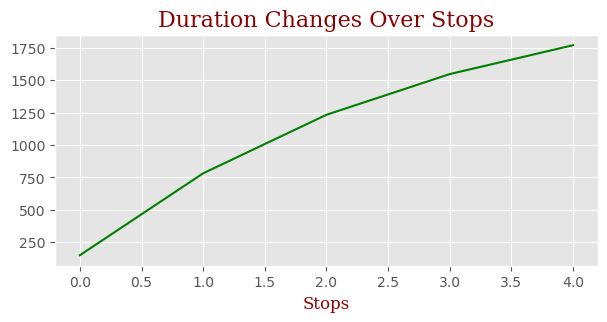

In [565]:
print(data.groupby("Total_Stops")['Duration'].mean())
plt.figure(figsize=(7,3))
data.groupby("Total_Stops")['Duration'].mean().plot(kind='line',color='green')
plt.title("Duration Changes Over Stops",fontdict=font1)
plt.xlabel("Stops",fontdict=font2)
plt.show()

- Yes there is a very significant difference in duration between non-stop and multi-stop flights.
- Non-stop flights (0 stops) have a much shorter average duration (~150 minutes), representing direct and efficient travel.
- Flight duration increases sharply with each additional stop, with 1-stop flights averaging ~782 minutes and extending beyond 1,700 minutes for 4-stop flights.

### Are early-morning or late-night flights generally cheaper?

In [568]:
def time_slot(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
data['Departure_Slot'] = data['Departure_hour'].apply(time_slot)

Departure_Slot
Night        8179.469767
Evening      9178.833263
Morning      9202.281555
Afternoon    9392.816658
Name: Price, dtype: float64


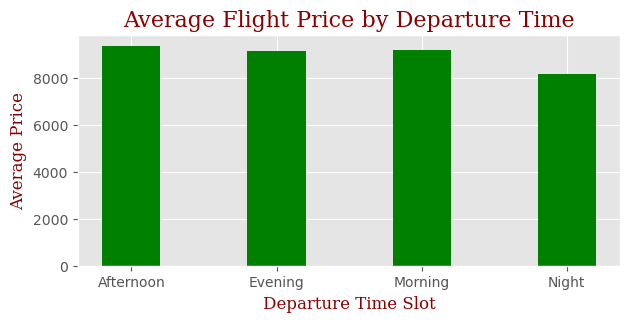

In [569]:
print(data.groupby('Departure_Slot')['Price'].mean().sort_values())
slot_price = data.groupby('Departure_Slot')['Price'].mean()
plt.figure(figsize=(7,3))
plt.bar(slot_price.index, slot_price.values,color='green',width=0.4)
plt.xlabel("Departure Time Slot",fontdict=font2)
plt.ylabel("Average Price",fontdict=font2)
plt.title("Average Flight Price by Departure Time",fontdict=font1)
plt.show()

- Yes —> late-night flights are the cheapest on average, with the lowest mean ticket price (~₹8,179).
- Morning and evening flights are more expensive, while afternoon flights have the highest average prices, likely due to peak travel demand.

### Which numerical features have the strongest correlation with price?

In [614]:
numerical_cols = data.select_dtypes(include=['int32', 'int64'])
price_corr = numerical_cols.corr()['Price'].sort_values(ascending=False)
price_corr


Price             1.000000
Total_Stops       0.603883
Duration          0.506371
Arrival_hour      0.024264
Departure_hour    0.006819
Departure_min    -0.024492
Arrival_min      -0.086155
Month            -0.103651
Date             -0.153738
Year                   NaN
Name: Price, dtype: float64

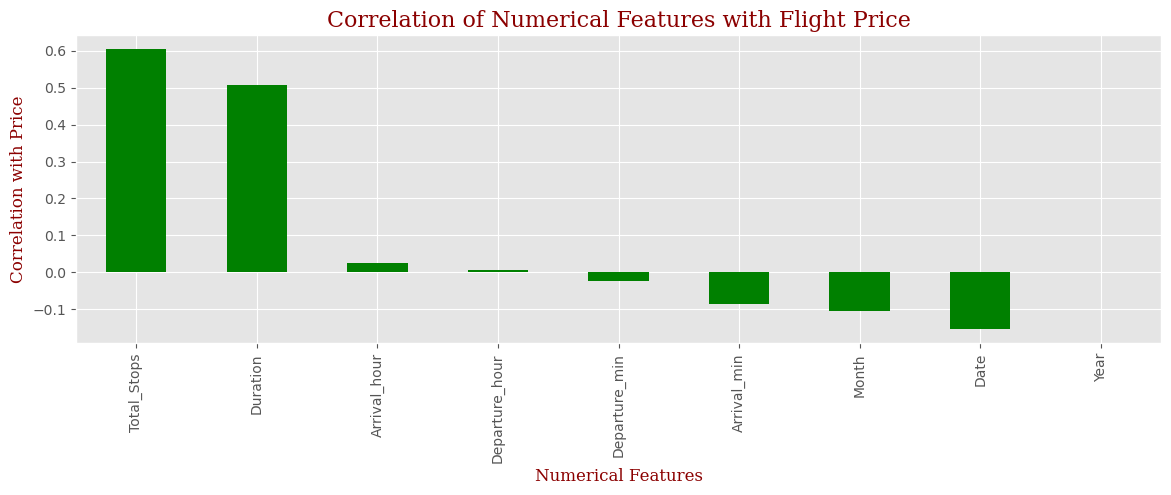

In [624]:
plt.figure(figsize=(14,4))
price_corr.drop('Price').plot(kind='bar',color='green')
plt.xlabel("Numerical Features",fontdict=font2)
plt.ylabel("Correlation with Price",fontdict=font2)
plt.title("Correlation of Numerical Features with Flight Price",fontdict=font1)
plt.show()

- Total_Stops (0.60) shows the strongest positive correlation with price, indicating that flights with more stops tend to be significantly more expensive.
- Duration (0.51) also has a moderate positive relationship with price, confirming that longer journeys generally cost more.
- Time-based features such as arrival/departure hours and minutes have very weak correlations, suggesting that clock time alone has little direct impact on ticket price.
- Date and Month show weak negative correlations, implying slight seasonal or booking-pattern effects rather than strong price drivers.